猫狗数据集包含 25,000 张猫狗图像（每个类别都有 12500 张），大小为 543 MB（压缩后）。下面创建一个新数据集，其中包含三个子集：每个类别各 1000 个样本的训练集、每个类别各 500 个样本的验证集和每个类别各 500 个样本的测试集。

In [2]:
import os, shutil

original_dataset_dir = r'D:\data\test\dogs-vs-cats\train'

base_dir = r'D:\data\test\dogs-vs-cats\cats_and_dogs_small'  # 保存较小数据集的目录
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]  # 前 1000 张猫的图像复制到 train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]  # 接下来 500 张猫图像复制到 validation_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]  # 接下来 500 张猫图像复制到 test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]  # 前 1000 张狗图像复制到 train_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]  # 接下来 500 张够图像复制到 validation_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]  # 接下来 500 张够图像复制到 test_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

下面来检查每个分组的图像张数。

In [3]:
print("total training cat images: ", len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [4]:
print("total training dog images: ", len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [5]:
print("total validation cat images: ", len(os.listdir(validation_cats_dir)))

total validation cat images:  500


In [6]:
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print("total test cat images:", len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# 构建网络


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)  # 将图像乘以 1/255 缩放
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),  # 将所有图像的大小调整为 150x150
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape:  (20,)


In [13]:
# fit_generator 和 fit 效果相同
history = model.fit_generator(
    train_generator,  # python 生成器
    steps_per_epoch=100,  # 共 2000 个样本，每次 20 个，需要 100 次
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50  # 1000 个样本，每次 20 个，需要 50 次
)
model.save('cats_and_dogs_small_1.h5')

C:\Users\happy\AppData\Local\Temp/ipykernel_47304/891838822.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 9s 40ms/step - loss: 0.6931 - acc: 0.5290 - val_loss: 0.6794 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 4s 35ms/step - loss: 0.6646 - acc: 0.6110 - val_loss: 0.6542 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.6271 - acc: 0.6460 - val_loss: 0.6234 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 3s 34ms/step - loss: 0.5900 - acc: 0.6760 - val_loss: 0.6192 - val_acc: 0.6440
Epoch 5/30
100/100 [==============================] - 4s 36ms/step - loss: 0.5519 - acc: 0.7195 - val_loss: 0.5963 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 3s 34ms/step - loss: 0.5198 - acc: 0.7335 - val_loss: 0.5864 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 0.4838 - acc: 0.7595 - val_loss: 0.6046 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 3s 34ms/step - 

绘制损失曲线和精度曲线

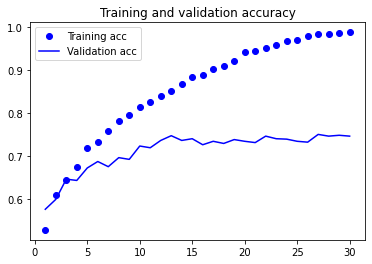

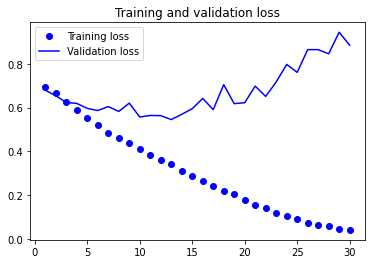

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

## 数据增强

样本相对较小（2000），导致了明显的过拟合。下面使用数据增强，计算机视觉领域常用的降低过拟合的技巧。

数据增强是从现有的训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加样本。其目标是，模型在训练时不会再次查看完全相同的图像。

下面通过对 `ImageDataGenerator` 实例读取的图像执行多次随机变换来实现。

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,  # 角度值 0-180，表示图像随机旋转的角度范围
    width_shift_range=0.2,  # 在水平或垂直方向平移的范围（相对总宽度或高度的比例）
    height_shift_range=0.2,
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 随机缩放的范围
    horizontal_flip=True,  # 随机将一半图像水平反转
    fill_mode='nearest'  # 填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移
)

显示几个随机增强后的训练图像

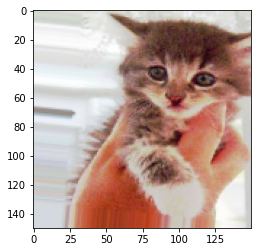

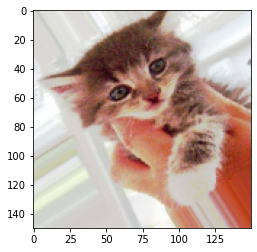

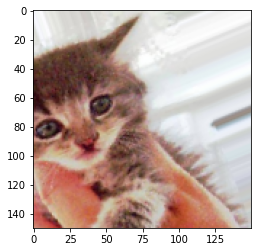

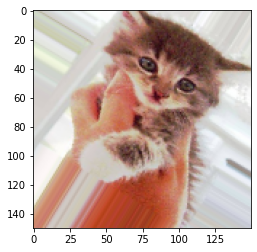

In [16]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # 选择一张图像进行增强
img = image.load_img(img_path, target_size=(150, 150))  # 读取图像并调整大小
x = image.img_to_array(img)  # 将其转换为形状 (150,150,3) 的 Numpy 数组
x = x.reshape((1,) + x.shape)  # 将其形状改变为 (1, 150,150,3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

使用数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网络看到的输入仍然是高度相关的，因为这些输入都来自于少量的额原始图像。因此，这种方法不足以完全消除过拟合。为了进一步降低过拟合，需要添加 Dropout 层。

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1. / 255)  # 不能增强验证数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6818 - acc: 0.5695 - val_loss: 0.6695 - val_acc: 0.5570


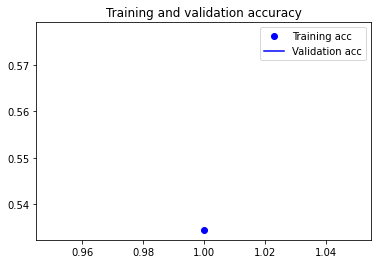

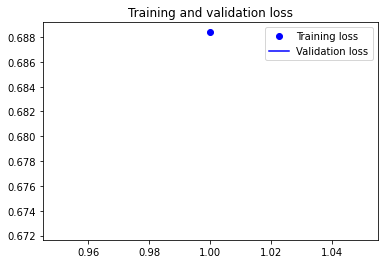

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()